In [1]:
RANDOM_SEED = 1

# import base packages into the namespace for this program
import numpy as np
import pandas as pd
from scipy import stats as st
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rc
import sklearn
from sklearn.model_selection import train_test_split
import itertools
from sklearn.linear_model import LogisticRegressionCV
from sklearn.linear_model import LogisticRegression

In [2]:
# initial work with the smaller data set
bank = pd.read_csv('bank.csv', sep = ';')  # start with smaller data set
# examine the shape of original input data
print(bank.shape)

(4521, 17)


In [3]:
# drop observations with missing data, if any
bank.dropna()
# examine the shape of input data after dropping missing data
print(bank.shape)

(4521, 17)


In [4]:
# look at the list of column names, note that y is the response
list(bank.columns.values)

['age',
 'job',
 'marital',
 'education',
 'default',
 'balance',
 'housing',
 'loan',
 'contact',
 'day',
 'month',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'poutcome',
 'response']

In [5]:
# look at the beginning of the DataFrame
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [6]:
bank.describe(include = "all")

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
count,4521.000000,4521,4521,4521,4521,4521.000000,4521,4521,4521,4521.000000,4521,4521.000000,4521.000000,4521.000000,4521.000000,4521,4521
unique,NaN,12,3,4,2,NaN,2,2,3,NaN,12,NaN,NaN,NaN,NaN,4,2
top,NaN,management,married,secondary,no,NaN,yes,no,cellular,NaN,may,NaN,NaN,NaN,NaN,unknown,no
freq,NaN,969,2797,2306,4445,NaN,2559,3830,2896,NaN,1398,NaN,NaN,NaN,NaN,3705,4000
mean,41.170095,NaN,NaN,NaN,NaN,1422.657819,NaN,NaN,NaN,15.915284,NaN,263.961292,2.793630,39.766645,0.542579,NaN,NaN
std,10.576211,NaN,NaN,NaN,NaN,3009.638142,NaN,NaN,NaN,8.247667,NaN,259.856633,3.109807,100.121124,1.693562,NaN,NaN
min,19.000000,NaN,NaN,NaN,NaN,-3313.000000,NaN,NaN,NaN,1.000000,NaN,4.000000,1.000000,-1.000000,0.000000,NaN,NaN
25%,33.000000,NaN,NaN,NaN,NaN,69.000000,NaN,NaN,NaN,9.000000,NaN,104.000000,1.000000,-1.000000,0.000000,NaN,NaN
50%,39.000000,NaN,NaN,NaN,NaN,444.000000,NaN,NaN,NaN,16.000000,NaN,185.000000,2.000000,-1.000000,0.000000,NaN,NaN
75%,49.000000,NaN,NaN,NaN,NaN,1480.000000,NaN,NaN,NaN,21.000000,NaN,329.000000,3.000000,-1.000000,0.000000,NaN,NaN


In [7]:
print(bank.groupby('response').mean())

                age      balance        day    duration  campaign      pdays  \
response                                                                       
no        40.998000  1403.211750  15.948750  226.347500  2.862250  36.006000   
yes       42.491363  1571.955854  15.658349  552.742802  2.266795  68.639155   

          previous  
response            
no        0.471250  
yes       1.090211  


<bound method NDFrame.head of       age            job  marital  education default  balance housing loan  \
0      30     unemployed  married    primary      no     1787      no   no   
1      33       services  married  secondary      no     4789     yes  yes   
2      35     management   single   tertiary      no     1350     yes   no   
3      30     management  married   tertiary      no     1476     yes  yes   
4      59    blue-collar  married  secondary      no        0     yes   no   
...   ...            ...      ...        ...     ...      ...     ...  ...   
4516   33       services  married  secondary      no     -333     yes   no   
4517   57  self-employed  married   tertiary     yes    -3313     yes  yes   
4518   57     technician  married  secondary      no      295      no   no   
4519   28    blue-collar  married  secondary      no     1137      no   no   
4520   44   entrepreneur   single   tertiary      no     1136     yes  yes   

       contact  day month  durati

(array([4.111e+03, 3.400e+02, 4.700e+01, 1.700e+01, 4.000e+00, 0.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([-3313. ,  4137.1, 11587.2, 19037.3, 26487.4, 33937.5, 41387.6,
        48837.7, 56287.8, 63737.9, 71188. ]),
 <a list of 10 Patch objects>)

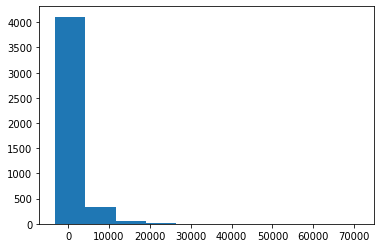

In [8]:
print(bank.head)
plt.hist(bank.balance)

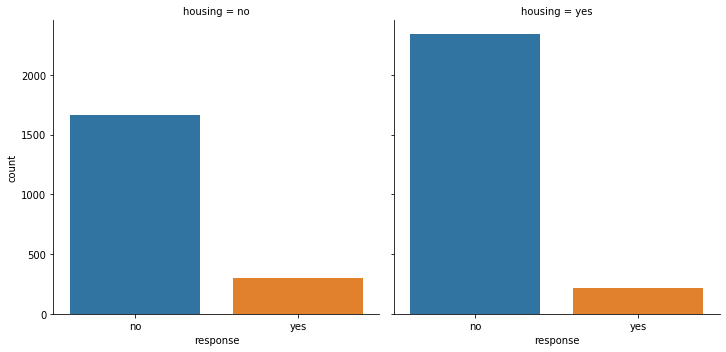

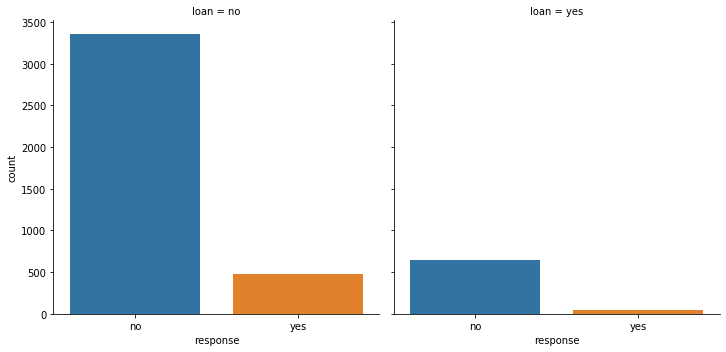

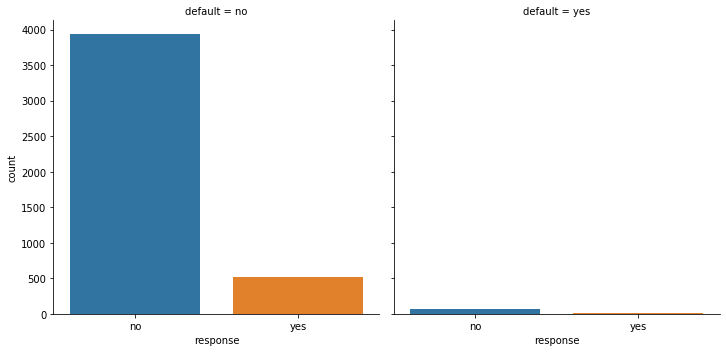

In [9]:
fig1 = sns.catplot(x = "response", col = "housing", data = bank, kind = "count")
fig2 = sns.catplot(x = "response", col = "loan", data = bank, kind = "count")
fig3 = sns.catplot(x = "response", col = "default", data = bank, kind = "count")

In [10]:
bank1 = pd.get_dummies(bank)

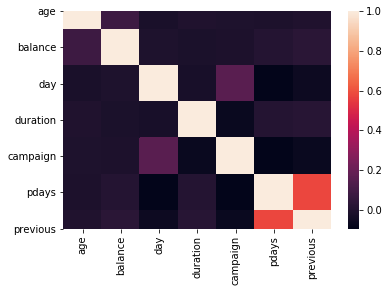

In [11]:
sns.heatmap(bank.corr())
plt.show()

In [12]:
# mapping function to convert text no/yes to integer 0/1
convert_to_binary = {'no' : 0, 'yes' : 1}

In [13]:
# define binary variable for having credit in default
default = bank['default'].map(convert_to_binary)

In [14]:
# define binary variable for having a mortgage or housing loan
housing = bank['housing'].map(convert_to_binary)

In [15]:
# define binary variable for having a personal loan
loan = bank['loan'].map(convert_to_binary)

In [16]:
# define response variable to use in the model
response = bank['response'].map(convert_to_binary)

In [17]:
# gather three explanatory variables and response into a numpy array 
# here we use .T to obtain the transpose for the structure we want
model_data = np.array([np.array(default), np.array(housing), np.array(loan), 
    np.array(response)]).T

# examine the shape of model_data, which we will use in subsequent modeling
print(model_data.shape)

# the rest of the program should set up the modeling methods
# and evaluation within a cross-validation design

(4521, 4)


In [18]:
bank_data = pd.DataFrame(model_data, columns = ['default', 'housing', 'loan', 'response'])

In [19]:
housing_response = pd.crosstab(bank_data.response,
               bank_data.housing,
               rownames = ['Response'], colnames = ['Housing'])

loan_response = pd.crosstab(bank_data.response,
               bank_data.loan,
               rownames = ['Response'], colnames = ['Loan'])

default_response = pd.crosstab(bank_data.response,
               bank_data.default,
               rownames = ['Response'], colnames = ['Default'])

print(housing_response, "\n")
print(loan_response, "\n")
print(default_response, "\n")

Housing      0     1
Response            
0         1661  2339
1          301   220 

Loan         0    1
Response           
0         3352  648
1          478   43 

Default      0   1
Response          
0         3933  67
1          512   9 



In [20]:
import sklearn.utils.validation as val
import random
trainnum = random.sample(range(1,4521), 900)
train = bank_data.loc[trainnum]
test = bank_data.drop(bank_data.index[trainnum])

trainX_train = train[['loan', 'default', 'housing']]
y_train = val.column_or_1d(train[['response']])
print(np.mean(bank_data['response']))

X_test = np.array(test[['loan', 'default', 'housing']])
y_test = np.array(val.column_or_1d(test[['response']]))

0.11523999115239991


In [21]:
from sklearn.utils import resample
minority = train[train['response'] == 1]
majority = train[train['response'] == 0]

newbank = resample(minority, replace = True, n_samples = len(majority), random_state = 123)
newbank = pd.concat([majority, newbank])
newbank.response.value_counts()

X_train = np.array(newbank[['loan', 'default', 'housing']])
y_train = val.column_or_1d(newbank[['response']])

In [23]:
from sklearn.metrics import roc_auc_score as roc
from sklearn.metrics import confusion_matrix as cm
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression as lr
from sklearn.model_selection import cross_val_score as cvs
from sklearn import metrics
nfolds = 10

lr_clf = lr(solver = 'lbfgs', multi_class = 'ovr')
lr_cvs = cvs(lr_clf, X_train, y_train, cv = nfolds)
print("Accuracy of LR: \n", lr_cvs)

Accuracy of LR: 
 [0.55063291 0.49367089 0.53164557 0.57594937 0.47468354 0.55063291
 0.60126582 0.58860759 0.58860759 0.57594937]



 Accuracy of NB: 
 [0.55063291 0.49367089 0.52531646 0.56962025 0.46835443 0.55063291
 0.60126582 0.58860759 0.58860759 0.57594937]


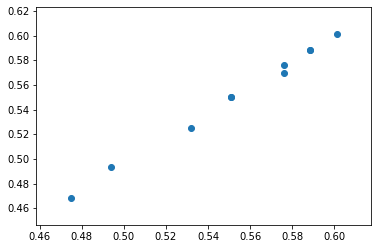

In [25]:
nb_clf = BernoulliNB()
nb_cvs = cvs(nb_clf, X_train, y_train, cv = nfolds)
print("\n Accuracy of NB: \n", nb_cvs)

from matplotlib.pyplot import scatter
scatter(lr_cvs, nb_cvs)

In [26]:
lr_clf.fit(X_train, y_train)
lrpred = lr_clf.predict_proba(X_train)
lrpred = [p[1] for p in lrpred]
lrpredclass = lr_clf.predict(X_train)

nb_clf.fit(X_train, y_train)
nbpred = nb_clf.predict_proba(X_train)
nbpred = [p[1] for p in nbpred]
nbpredclass = nb_clf.predict(X_train)

def metrics(y, mypred, mypredclass):
    print("Area Under the Curve", roc(y, mypred))
    myconfusion = cm(y, mypredclass)
    PPV = (myconfusion[1,1]/(myconfusion[1,0] + myconfusion[1,1]))
    NPV = (myconfusion[0,0]/(myconfusion[0,0] + myconfusion[0,1]))
    print("\n Confusion Matrix: \n", myconfusion)
    print("\n PPV, Correctly Classifies Response Yes: \n", PPV)
    print("\n NPV, Correct Classifies Response No: \n", NPV)
    
metrics(y_train, lrpred, lrpredclass)
metrics(y_train, nbpred, nbpredclass)

Area Under the Curve 0.5697059766063131

 Confusion Matrix: 
 [[491 299]
 [402 388]]

 PPV, Correctly Classifies Response Yes: 
 0.4911392405063291

 NPV, Correct Classifies Response No: 
 0.6215189873417721
Area Under the Curve 0.5697059766063131

 Confusion Matrix: 
 [[491 299]
 [408 382]]

 PPV, Correctly Classifies Response Yes: 
 0.4835443037974684

 NPV, Correct Classifies Response No: 
 0.6215189873417721


In [40]:
lrpred = lr_clf.predict_proba(X_test)
lrpred = [p[1] for p in lrpred]
lrpredclass = lr_clf.predict(X_test)

nbpred = nb_clf.predict_proba(X_test)
nbpred = [p[1] for p in nbpred]
nbpredclass = nb_clf.predict(X_test)

metrics(y_test, lrpred, lrpredclass)
metrics(y_test, nbpred, nbpredclass)

Area Under the Curve 0.6123750293714139

 Confusion Matrix: 
 [[2072 1138]
 [ 180  231]]

 PPV, Correctly Classifies Response Yes: 
 0.5620437956204379

 NPV, Correct Classifies Response No: 
 0.6454828660436137
Area Under the Curve 0.6123750293714139

 Confusion Matrix: 
 [[2084 1126]
 [ 181  230]]

 PPV, Correctly Classifies Response Yes: 
 0.559610705596107

 NPV, Correct Classifies Response No: 
 0.6492211838006231


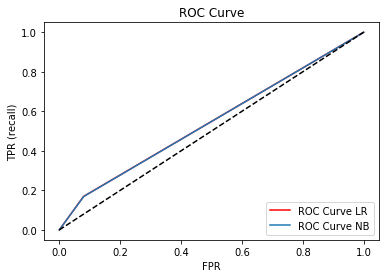

In [43]:
#ROC
from sklearn.metrics import roc_curve
fpr_nb, tpr_nb, thresholds_nb = roc_curve(lrpredclass, y_test)
fpr, tpr, thresholds = roc_curve(nbpredclass, y_test)

plt.plot(fpr, tpr, label="ROC Curve LR", color ="red")
plt.plot(fpr_nb, tpr_nb, label="ROC Curve NB")

plt.xlabel("FPR")
plt.ylabel("TPR (recall)")
plt.plot([0, 1], [0, 1], 'k--')
plt.title("ROC Curve")
plt.legend(loc=4)